In [1]:
import pylab
import pymoc
import xidplus
import numpy as np
%matplotlib inline
from astropy.table import Table

In [2]:
import seaborn as sns

This notebook uses all the raw data from the XID+MIPS catalogue, maps, PSF and relevant MOCs to create XID+ prior object and relevant tiling scheme

## Read in MOCs
The selection functions required are the main MOC associated with the masterlist. 

In [3]:
Sel_func=pymoc.MOC()
# Sel_func.read('../data/CDFS-SWIRE/holes_CDFS-SWIRE_irac1_O16_MOC.fits')
Sel_func.read('../../dmu4/dmu4_sm_CDFS-SWIRE/data/holes_CDFS-SWIRE_irac1_O16_MOC.fits') # Update masterlist

## Read in XID+MIPS catalogue

In [4]:
# XID_MIPS=Table.read('../data/CDFS-SWIRE/MIPS/dmu26_XID+MIPS_CDFS-SWIRE_cat_20170901.fits')
XID_MIPS=Table.read('../dmu26_XID+MIPS_CDFS-SWIRE/data/dmu26_XID+MIPS_CDFS-SWIRE_cat_20201205.fits') # Update masterlist

In [5]:
XID_MIPS[0:10]

help_id,RA,Dec,F_MIPS_24,FErr_MIPS_24_u,FErr_MIPS_24_l,Bkg_MIPS_24,Sig_conf_MIPS_24,Rhat_MIPS_24,n_eff_MIPS_24,Pval_res_24,flag_mips_24
,degrees,degrees,muJy,muJy,muJy,MJy / sr,MJy / sr,,,,
bytes27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,bool
HELP_J033650.824-295620.783,54.211766390022845,-29.9391064859918,272.50247,540.70447,86.236374,-0.003483794,5.029496e-06,1.0027044,1124.0,0.0,False
HELP_J033655.442-295449.596,54.23101021455793,-29.91377659143576,236.55391,506.73215,68.16577,-0.0006361296,5.0581343e-06,0.9994119,1476.0,0.0,False
HELP_J033616.314-295548.181,54.067976200022855,-29.9300503059918,301.9198,318.07288,286.00903,-0.004160782,5.0500876e-06,nan,1700.0,0.0,False
HELP_J033601.094-295546.425,54.00455690002285,-29.929562435991798,81.58568,95.428375,67.528366,0.0016651336,4.938521e-06,nan,1122.0,0.0,False
HELP_J033608.786-295409.821,54.03660934002285,-29.9027279559918,6.9124126,15.632443,2.0185032,-0.0052455342,5.063621e-06,nan,2000.0,0.0,True
HELP_J033606.888-295518.496,54.028701300022846,-29.9218044959918,36.028355,50.140163,21.682087,-0.0052455342,5.063621e-06,nan,719.0,0.0,False
HELP_J033610.856-295506.940,54.04523478002285,-29.918594405991797,250.45511,263.87708,237.46614,-0.0052455342,5.063621e-06,nan,1863.0,0.0,False
HELP_J033607.350-295516.790,54.030623590022856,-29.9213304359918,184.89633,199.12378,170.45247,-0.0052455342,5.063621e-06,nan,1419.0,0.0,False


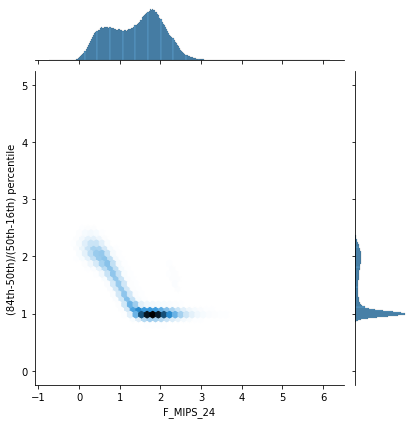

In [8]:
import seaborn as sns
skew=(XID_MIPS['FErr_MIPS_24_u']-XID_MIPS['F_MIPS_24'])/(XID_MIPS['F_MIPS_24']-XID_MIPS['FErr_MIPS_24_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
use = skew < 5
g=sns.jointplot(x=np.log10(XID_MIPS['F_MIPS_24'][use]),y=skew[use], kind='hex')

The uncertianties become Gaussian by $\sim 20 \mathrm{\mu Jy}$

In [9]:
good=XID_MIPS['F_MIPS_24']>20

In [10]:
good.sum()

283406

## Read in Maps

In [11]:
# pswfits='../data/CDFS-SWIRE/SPIRE/CDFS-SWIRE-NEST_image_250_SMAP_v6.0.fits'#SPIRE 250 map
# pmwfits='../data/CDFS-SWIRE/SPIRE/CDFS-SWIRE-NEST_image_350_SMAP_v6.0.fits'#SPIRE 350 map
# plwfits='../data/CDFS-SWIRE/SPIRE/CDFS-SWIRE-NEST_image_500_SMAP_v6.0.fits'#SPIRE 500 map

# pswfits='../../dmu19/dmu19_CDFS-SWIRE/data/CDFS-SWIRE-NEST_image_250_SMAP_v6.0.fits'#SPIRE 250 map
# pmwfits='../../dmu19/dmu19_CDFS-SWIRE/data/CDFS-SWIRE-NEST_image_350_SMAP_v6.0.fits'#SPIRE 350 map
# plwfits='../../dmu19/dmu19_CDFS-SWIRE/data/CDFS-SWIRE-NEST_image_500_SMAP_v6.0.fits'#SPIRE 500 map

pswfits='../../dmu19/dmu19_HELP-SPIRE-maps/data/CDFS-SWIRE_SPIRE250_v1.0.fits'#SPIRE 250 map
pmwfits='../../dmu19/dmu19_HELP-SPIRE-maps/data/CDFS-SWIRE_SPIRE350_v1.0.fits'#SPIRE 350 map
plwfits='../../dmu19/dmu19_HELP-SPIRE-maps/data/CDFS-SWIRE_SPIRE500_v1.0.fits'#SPIRE 500 map


#output folder
output_folder='./data/'

In [10]:
# from astropy.io import fits
# from astropy import wcs

# #-----250-------------
# hdulist = fits.open(pswfits)
# im250phdu=hdulist[0].header
# im250hdu=hdulist[1].header

# im250=hdulist[1].data*1.0E3 #convert to mJy
# nim250=hdulist[2].data*1.0E3 #convert to mJy
# w_250 = wcs.WCS(hdulist[1].header)
# pixsize250=3600.0*w_250.wcs.cd[1,1] #pixel size (in arcseconds)
# hdulist.close()
# #-----350-------------
# hdulist = fits.open(pmwfits)
# im350phdu=hdulist[0].header
# im350hdu=hdulist[1].header

# im350=hdulist[1].data*1.0E3 #convert to mJy
# nim350=hdulist[2].data*1.0E3 #convert to mJy
# w_350 = wcs.WCS(hdulist[1].header)
# pixsize350=3600.0*w_350.wcs.cd[1,1] #pixel size (in arcseconds)
# hdulist.close()
# #-----500-------------
# hdulist = fits.open(plwfits)
# im500phdu=hdulist[0].header
# im500hdu=hdulist[1].header
# im500=hdulist[1].data*1.0E3 #convert to mJy
# nim500=hdulist[2].data*1.0E3 #convert to mJy
# w_500 = wcs.WCS(hdulist[1].header)
# pixsize500=3600.0*w_500.wcs.cd[1,1] #pixel size (in arcseconds)
# hdulist.close()

In [12]:
from astropy.io import fits
from astropy import wcs

#-----250-------------
hdulist = fits.open(pswfits)
im250phdu=hdulist[0].header
im250hdu=hdulist['IMAGE'].header

im250=hdulist['IMAGE'].data*1.0E3 #convert to mJy
nim250=hdulist['ERROR'].data*1.0E3 #convert to mJy
w_250 = wcs.WCS(hdulist['IMAGE'].header)
pixsize250=3600.0*w_250.wcs.cd[1,1] #pixel size (in arcseconds)
hdulist.close()
#-----350-------------
hdulist = fits.open(pmwfits)
im350phdu=hdulist[0].header
im350hdu=hdulist['IMAGE'].header

im350=hdulist['IMAGE'].data*1.0E3 #convert to mJy
nim350=hdulist['ERROR'].data*1.0E3 #convert to mJy
w_350 = wcs.WCS(hdulist['IMAGE'].header)
pixsize350=3600.0*w_350.wcs.cd[1,1] #pixel size (in arcseconds)
hdulist.close()
#-----500-------------
hdulist = fits.open(plwfits)
im500phdu=hdulist[0].header
im500hdu=hdulist['IMAGE'].header

im500=hdulist['IMAGE'].data*1.0E3 #convert to mJy
nim500=hdulist['ERROR'].data*1.0E3 #convert to mJy
w_500 = wcs.WCS(hdulist['IMAGE'].header)
pixsize500=3600.0*w_500.wcs.cd[1,1] #pixel size (in arcseconds)
hdulist.close()

In [13]:
## Set XID+ prior class

In [14]:
#---prior250--------
prior250=xidplus.prior(im250,nim250,im250phdu,im250hdu, moc=Sel_func)#Initialise with map, uncertianty map, wcs info and primary header
prior250.prior_cat(XID_MIPS['RA'][good],XID_MIPS['Dec'][good],'dmu26_XID+MIPS_CDFS-SWIRE_cat_20201205.fits',ID=XID_MIPS['help_id'][good])#Set input catalogue
prior250.prior_bkg(-5.0,5)#Set prior on background (assumes Gaussian pdf with mu and sigma)
#---prior350--------
prior350=xidplus.prior(im350,nim350,im350phdu,im350hdu, moc=Sel_func)
prior350.prior_cat(XID_MIPS['RA'][good],XID_MIPS['Dec'][good],'dmu26_XID+MIPS_CDFS-SWIRE_cat_20201205.fits',ID=XID_MIPS['help_id'][good])
prior350.prior_bkg(-5.0,5)

#---prior500--------
prior500=xidplus.prior(im500,nim500,im500phdu,im500hdu, moc=Sel_func)
prior500.prior_cat(XID_MIPS['RA'][good],XID_MIPS['Dec'][good],'dmu26_XID+MIPS_CDFS-SWIRE_cat_20201205.fits',ID=XID_MIPS['help_id'][good])
prior500.prior_bkg(-5.0,5)

In [15]:
#pixsize array (size of pixels in arcseconds)
pixsize=np.array([pixsize250,pixsize350,pixsize500])
#point response function for the three bands
prfsize=np.array([18.15,25.15,36.3])
#use Gaussian2DKernel to create prf (requires stddev rather than fwhm hence pfwhm/2.355)
from astropy.convolution import Gaussian2DKernel

##---------fit using Gaussian beam-----------------------
prf250=Gaussian2DKernel(prfsize[0]/2.355,x_size=101,y_size=101)
prf250.normalize(mode='peak')
prf350=Gaussian2DKernel(prfsize[1]/2.355,x_size=101,y_size=101)
prf350.normalize(mode='peak')
prf500=Gaussian2DKernel(prfsize[2]/2.355,x_size=101,y_size=101)
prf500.normalize(mode='peak')

pind250=np.arange(0,101,1)*1.0/pixsize[0] #get 250 scale in terms of pixel scale of map
pind350=np.arange(0,101,1)*1.0/pixsize[1] #get 350 scale in terms of pixel scale of map
pind500=np.arange(0,101,1)*1.0/pixsize[2] #get 500 scale in terms of pixel scale of map

prior250.set_prf(prf250.array,pind250,pind250)#requires psf as 2d grid, and x and y bins for grid (in pixel scale)
prior350.set_prf(prf350.array,pind350,pind350)
prior500.set_prf(prf500.array,pind500,pind500)

In [17]:
# import pickle
# #from moc, get healpix pixels at a given order
# from xidplus import moc_routines
# order=9
# tiles=moc_routines.get_HEALPix_pixels(order,prior250.sra,prior250.sdec,unique=True)
# order_large=6
# tiles_large=moc_routines.get_HEALPix_pixels(order_large,prior250.sra,prior250.sdec,unique=True)
# print('----- There are '+str(len(tiles))+' tiles required for input catalogue and '+str(len(tiles_large))+' large tiles')
# output_folder='./'
# outfile=output_folder+'Master_prior.pkl'
# with open(outfile, 'wb') as f:
#     pickle.dump({'priors':[prior250,prior350,prior500],'tiles':tiles,'order':order,'version':xidplus.io.git_version()},f)
# outfile=output_folder+'Tiles.pkl'
# with open(outfile, 'wb') as f:
#     pickle.dump({'tiles':tiles,'order':order,'tiles_large':tiles_large,'order_large':order_large,'version':xidplus.io.git_version()},f)
# raise SystemExit()

----- There are 670 tiles required for input catalogue and 18 large tiles


SystemExit: 

In [18]:
# prior250.nsrc

240489

In [16]:
import pickle
#from moc, get healpix pixels at a given order
from xidplus import moc_routines
order=9
tiles=moc_routines.get_HEALPix_pixels(order,prior250.sra,prior250.sdec,unique=True)
order_large=6
tiles_large=moc_routines.get_HEALPix_pixels(order_large,prior250.sra,prior250.sdec,unique=True)
print('----- There are '+str(len(tiles))+' tiles required for input catalogue and '+str(len(tiles_large))+' large tiles')
output_folder='./data/'
outfile=output_folder+'Master_prior.pkl'
with open(outfile, 'wb') as f:
    pickle.dump({'priors':[prior250,prior350,prior500],'tiles':tiles,'order':order,'version':xidplus.io.git_version()},f)
outfile=output_folder+'Tiles.pkl'
with open(outfile, 'wb') as f:
    pickle.dump({'tiles':tiles,'order':order,'tiles_large':tiles_large,'order_large':order_large,'version':xidplus.io.git_version()},f)
raise SystemExit()

----- There are 676 tiles required for input catalogue and 18 large tiles


SystemExit: 

In [17]:
prior250.nsrc

283406